# scRNAseq_keloid_sampleNF2_do_seurat

In [1]:
rm(list=ls())
gc()
library(Seurat)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,532330,28.5,1200052,64.1,641780,34.3
Vcells,991466,7.6,8388608,64.0,1754429,13.4


In [2]:
setwd("/Project_dirctory/cellRanger_wd/NF2/outs/filtered_feature_bc_matrix")

In [3]:
NF2.counts <- Read10X(data.dir = getwd())

In [4]:
dobultes=read.table("doubletsRes.txt",header=F,sep="\t")
str(dobultes)
dobultes[is.na(dobultes[,1]),1]=1
which(is.na(dobultes[,1])>0)
sum(dobultes[,1])
#375
dobultesIndex=dobultes[,1]>0
NF2.counts.noDoublet=NF2.counts[,!dobultesIndex]
dim(NF2.counts.noDoublet)

'data.frame':	9878 obs. of  1 variable:
 $ V1: num  1 0 0 0 0 0 0 0 0 0 ...


integer(0)

[1] 375

[1] 33538  9503

In [5]:
NF2 <- CreateSeuratObject(counts = NF2.counts.noDoublet,project = "NF2", min.cells = 3, min.features = 200)

In [6]:
NF2

An object of class Seurat 
21531 features across 8287 samples within 1 assay 
Active assay: RNA (21531 features)

In [7]:
NF2[["percent.mt"]] <- PercentageFeatureSet(NF2, pattern = "^MT-")

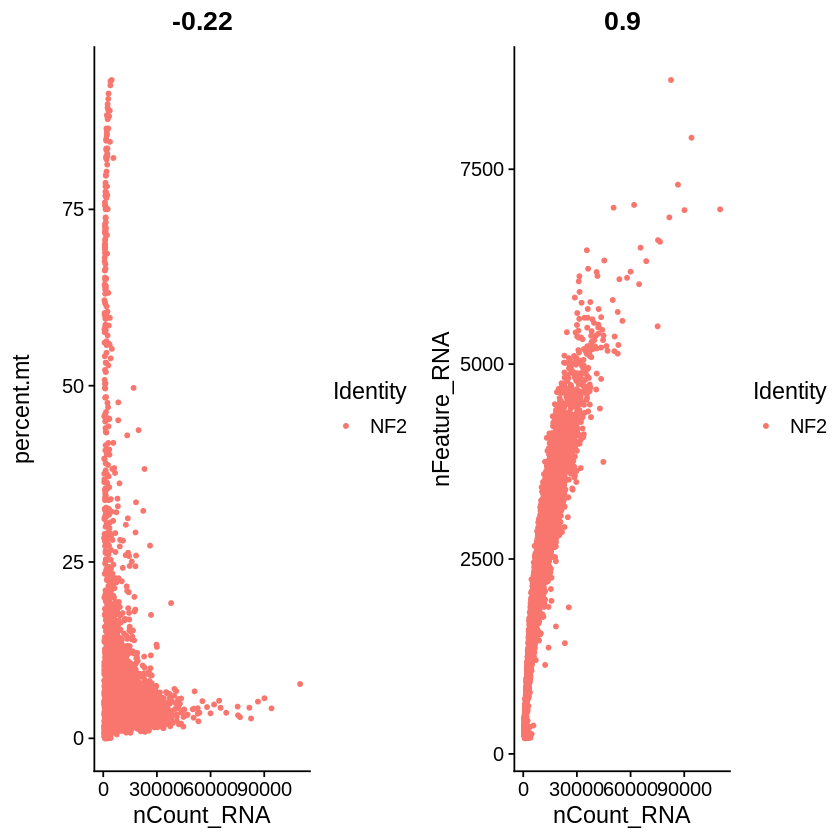

In [8]:
plot1 <- FeatureScatter(NF2, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(NF2, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
CombinePlots(plots = list(plot1, plot2))

In [9]:
NF2 <- subset(NF2, subset = nFeature_RNA > 1000 & nFeature_RNA < 6000 & percent.mt < 15)

In [10]:
NF2

An object of class Seurat 
21531 features across 7523 samples within 1 assay 
Active assay: RNA (21531 features)

In [11]:
NF2 <- NormalizeData(NF2, normalization.method = "LogNormalize", scale.factor = 10000)
NF2 <- FindVariableFeatures(NF2, selection.method = "vst", nfeatures = 2000)
NF2 <- ScaleData(NF2, verbose = FALSE)
NF2 <- RunPCA(NF2, npcs = 30, verbose = FALSE)
NF2 <- RunUMAP(NF2, reduction = "pca", dims = 1:15)
NF2 <- FindNeighbors(NF2, dims = 1:15)
NF2 <- FindClusters(NF2, resolution = 0.5)
NF2 <- RunTSNE(object = NF2, dims.use = 1:15, do.fast = TRUE)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”10:32:46 UMAP embedding parameters a = 0.9922 b = 1.112
10:32:46 Read 7523 rows and found 15 numeric columns
10:32:46 Using Annoy for neighbor search, n_neighbors = 30
10:32:46 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
10:32:48 Writing NN index file to temp file /tmp/RtmpEUrEj2/file54198467fbf78
10:32:48 Searching Annoy index using 1 thread, search_k = 3000
10:32:51 Annoy recall = 100%
10:32:52 Commencing smooth kNN distance calibration using 1 thread
10:32:52 Initializing from normalized Laplacian + noise
10:32:53 Commencing optimizati

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7523
Number of edges: 242333

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9224
Number of communities: 15
Elapsed time: 0 seconds



********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

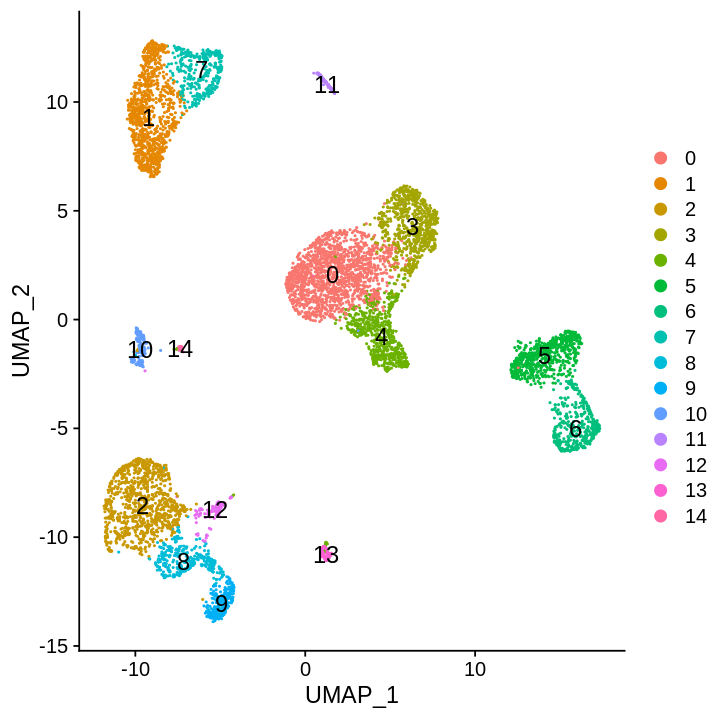

In [12]:
library(cowplot)
options(repr.plot.width=6,repr.plot.height=6)
DimPlot(NF2, reduction = "umap",label = T,label.size = 5)

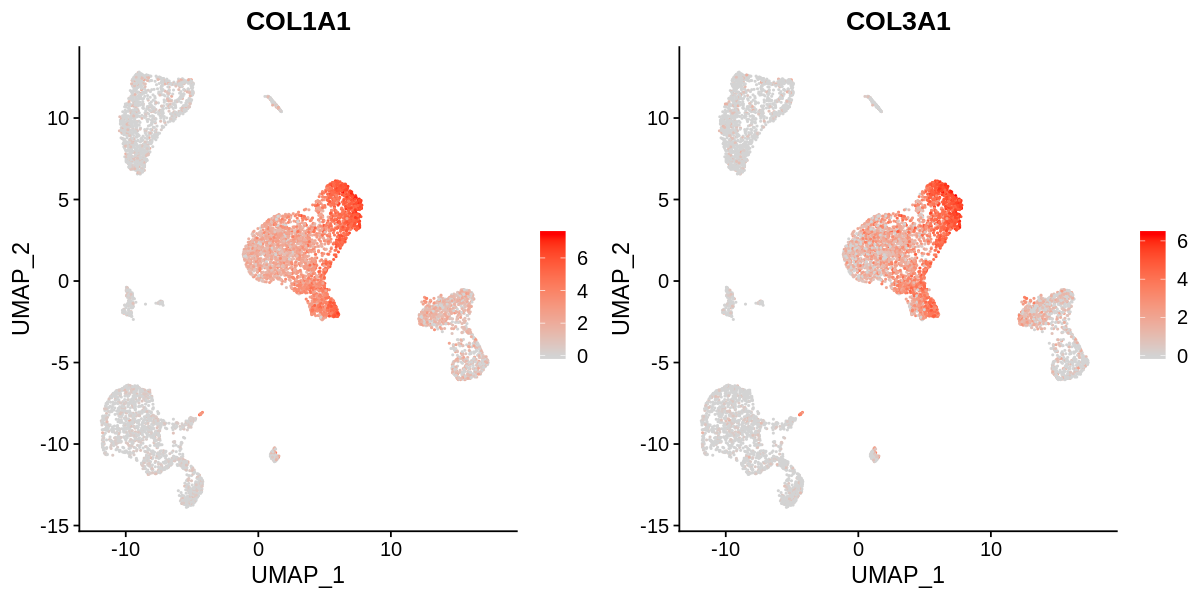

In [13]:
#fibroblast
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF2, features = c("COL1A1","COL3A1"),nc=2,cols=c("lightgrey", "red"))

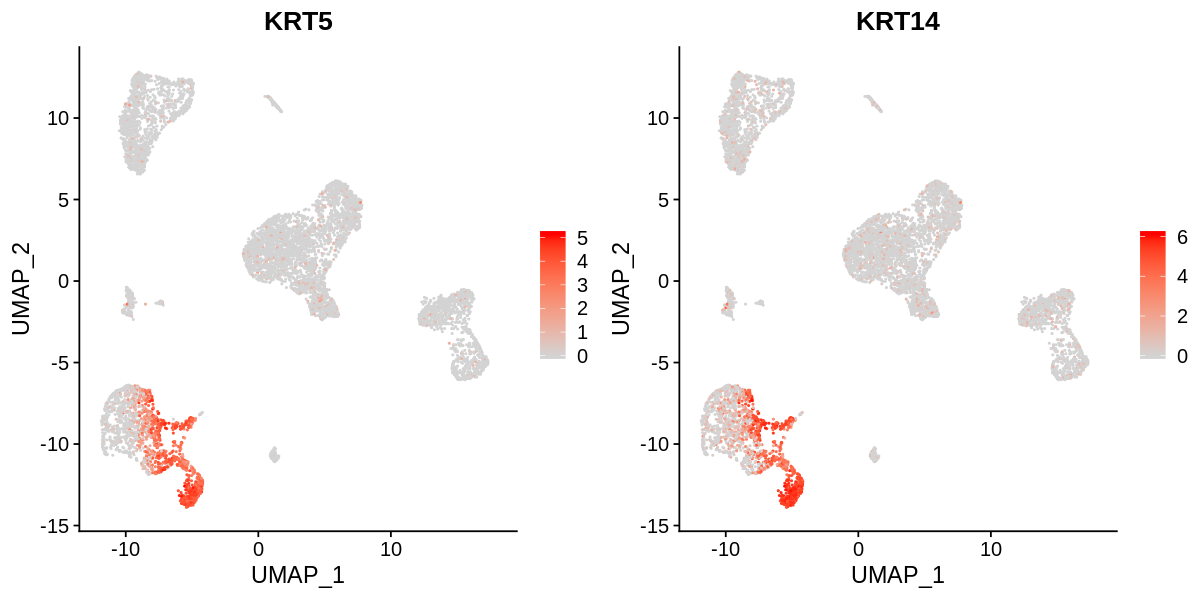

In [14]:
#basal cell (keratinocytes)
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF2, features = c("KRT5", "KRT14"),cols=c("lightgrey", "red"))

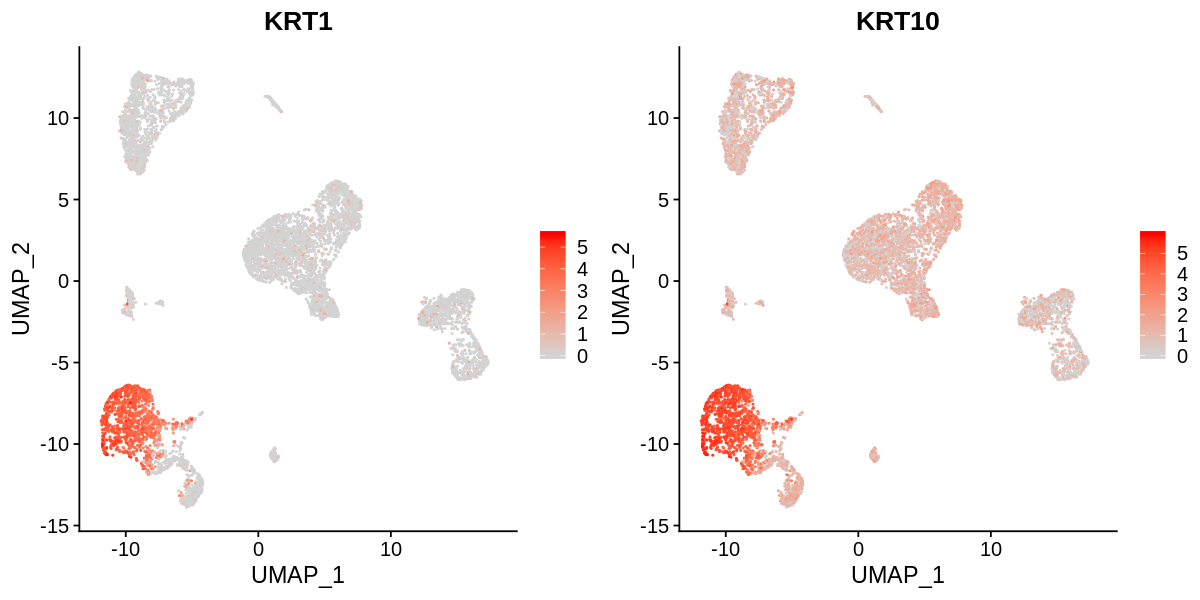

In [15]:
#keratinocytes spinous_cell
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF2, features = c("KRT1", "KRT10"),cols=c("lightgrey", "red"))

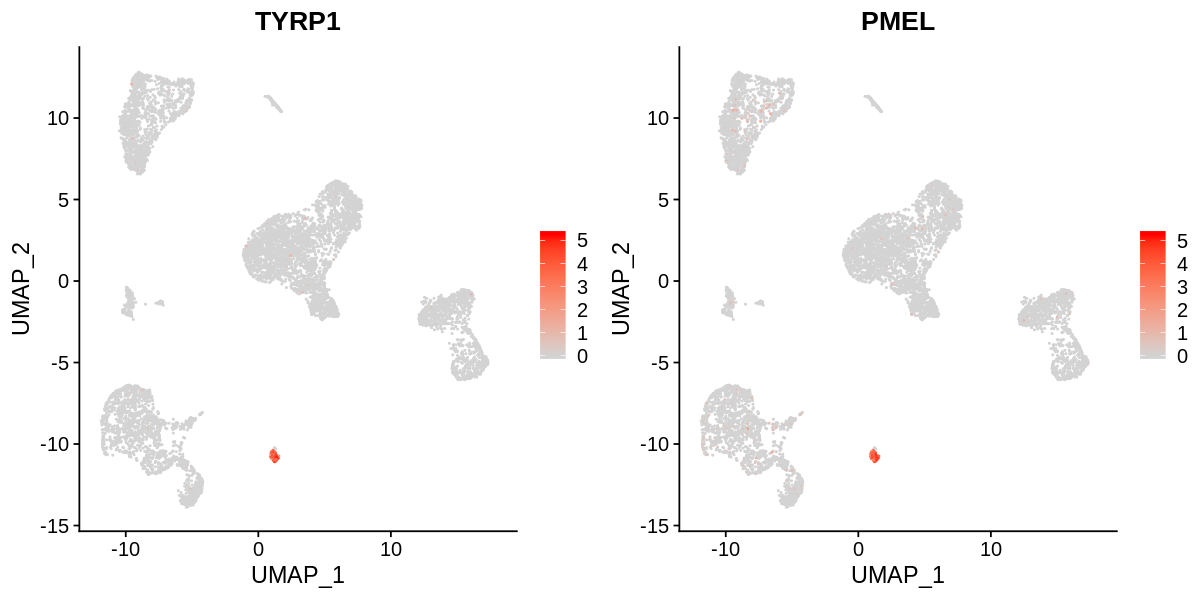

In [17]:
#Melanocytes
options(repr.plot.width=10,repr.plot.height=5)
FeaturePlot(NF2, features = c("TYRP1", "PMEL"),cols=c("lightgrey", "red"))

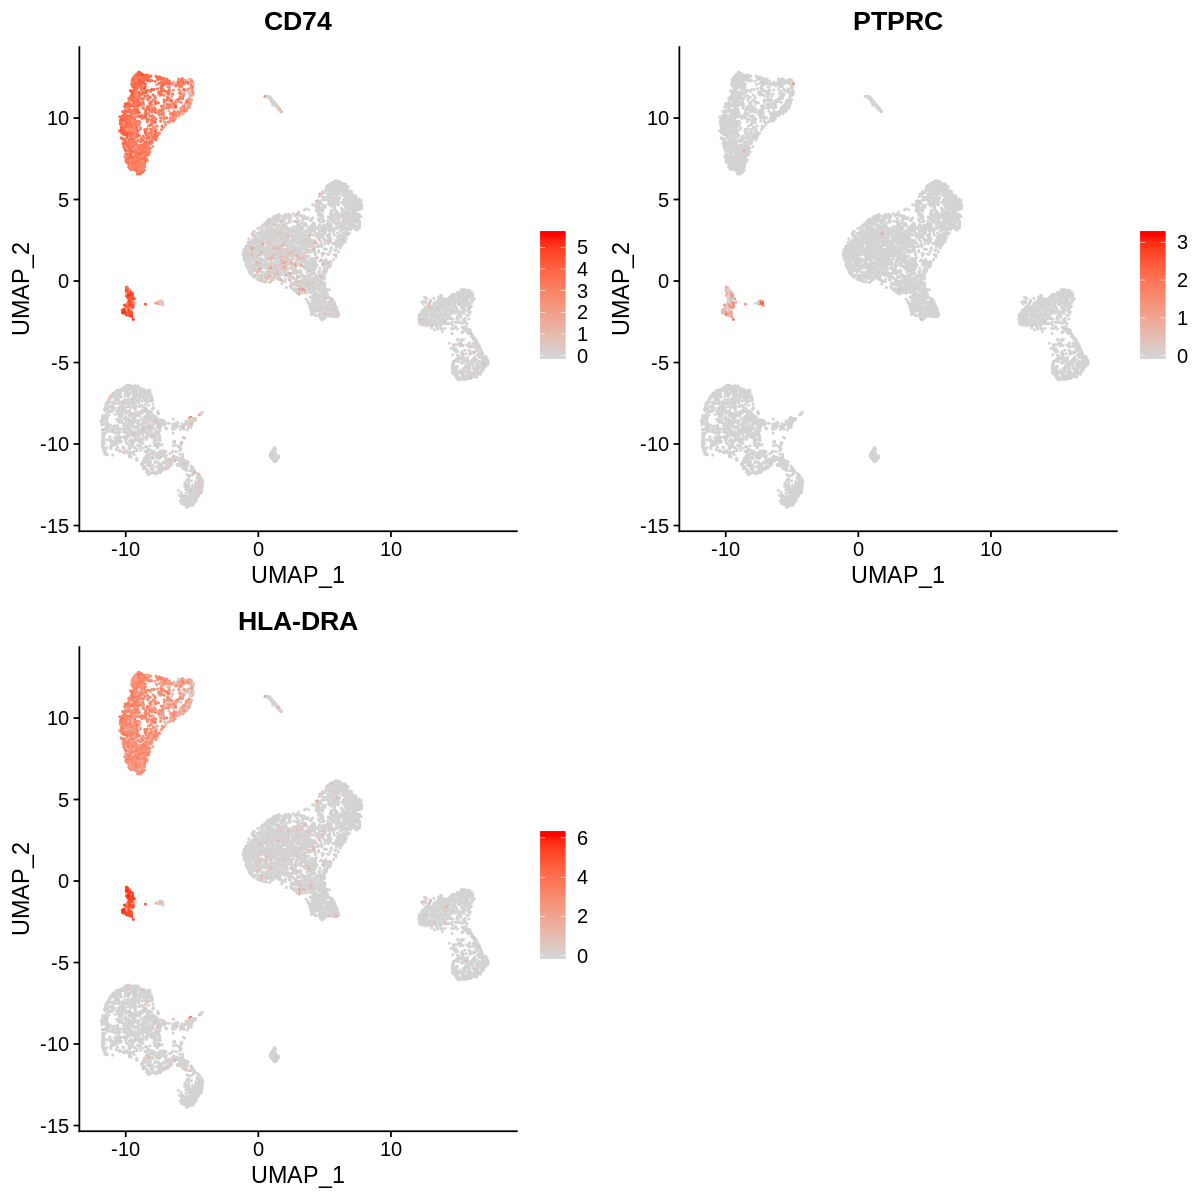

In [18]:
#immune
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF2, features = c("CD74", "PTPRC","HLA-DRA"),cols=c("lightgrey", "red"))

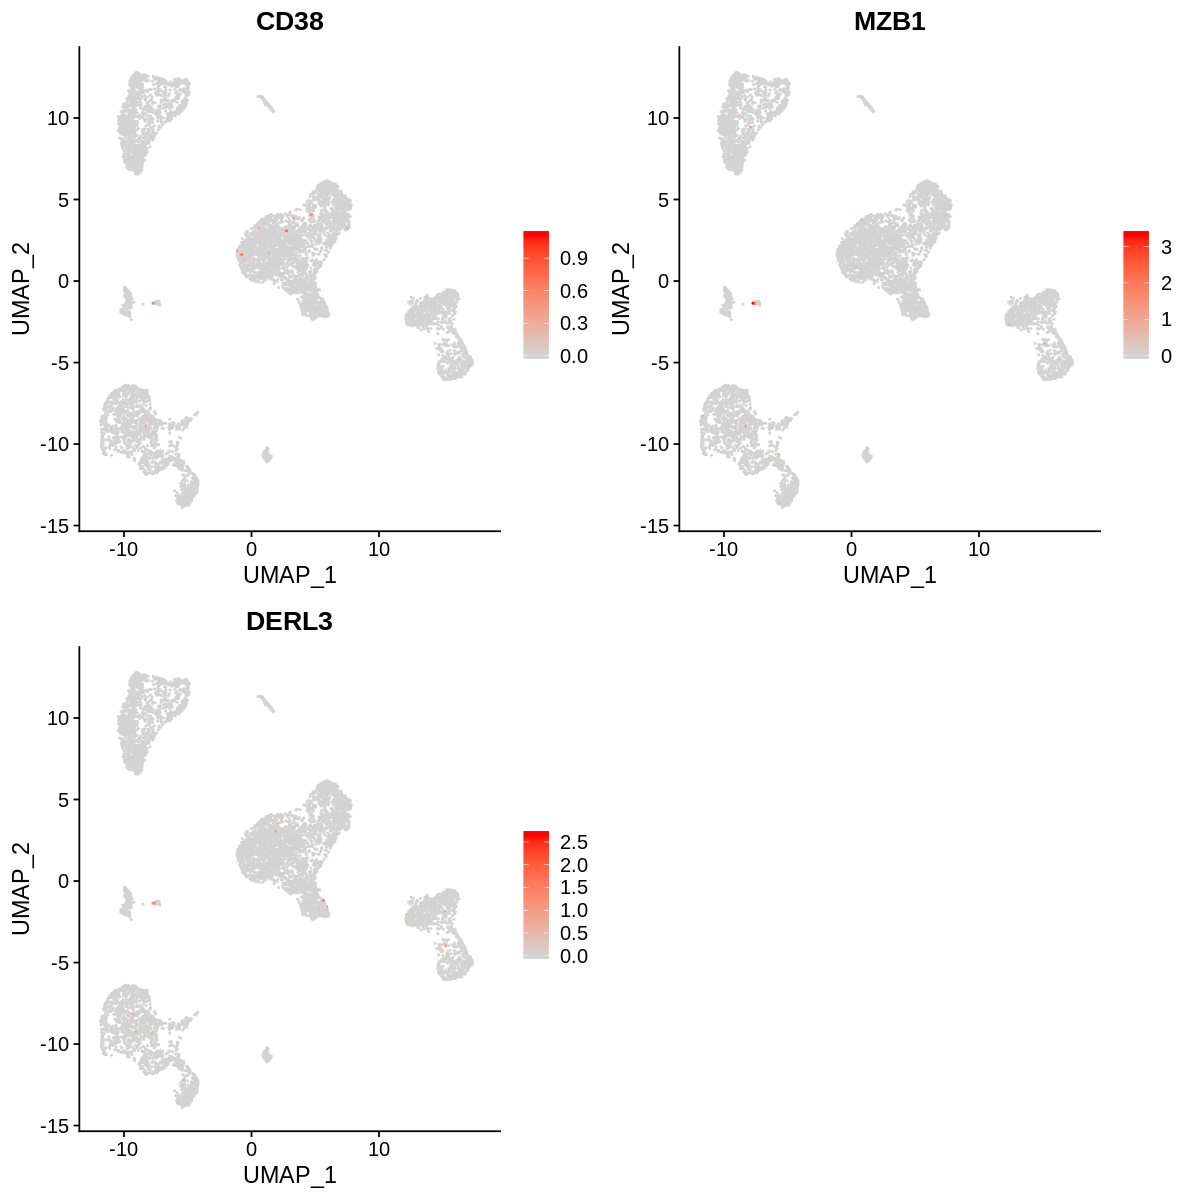

In [19]:
#immune B
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF2, features = c("CD38","MZB1","DERL3"),cols=c("lightgrey", "red"))

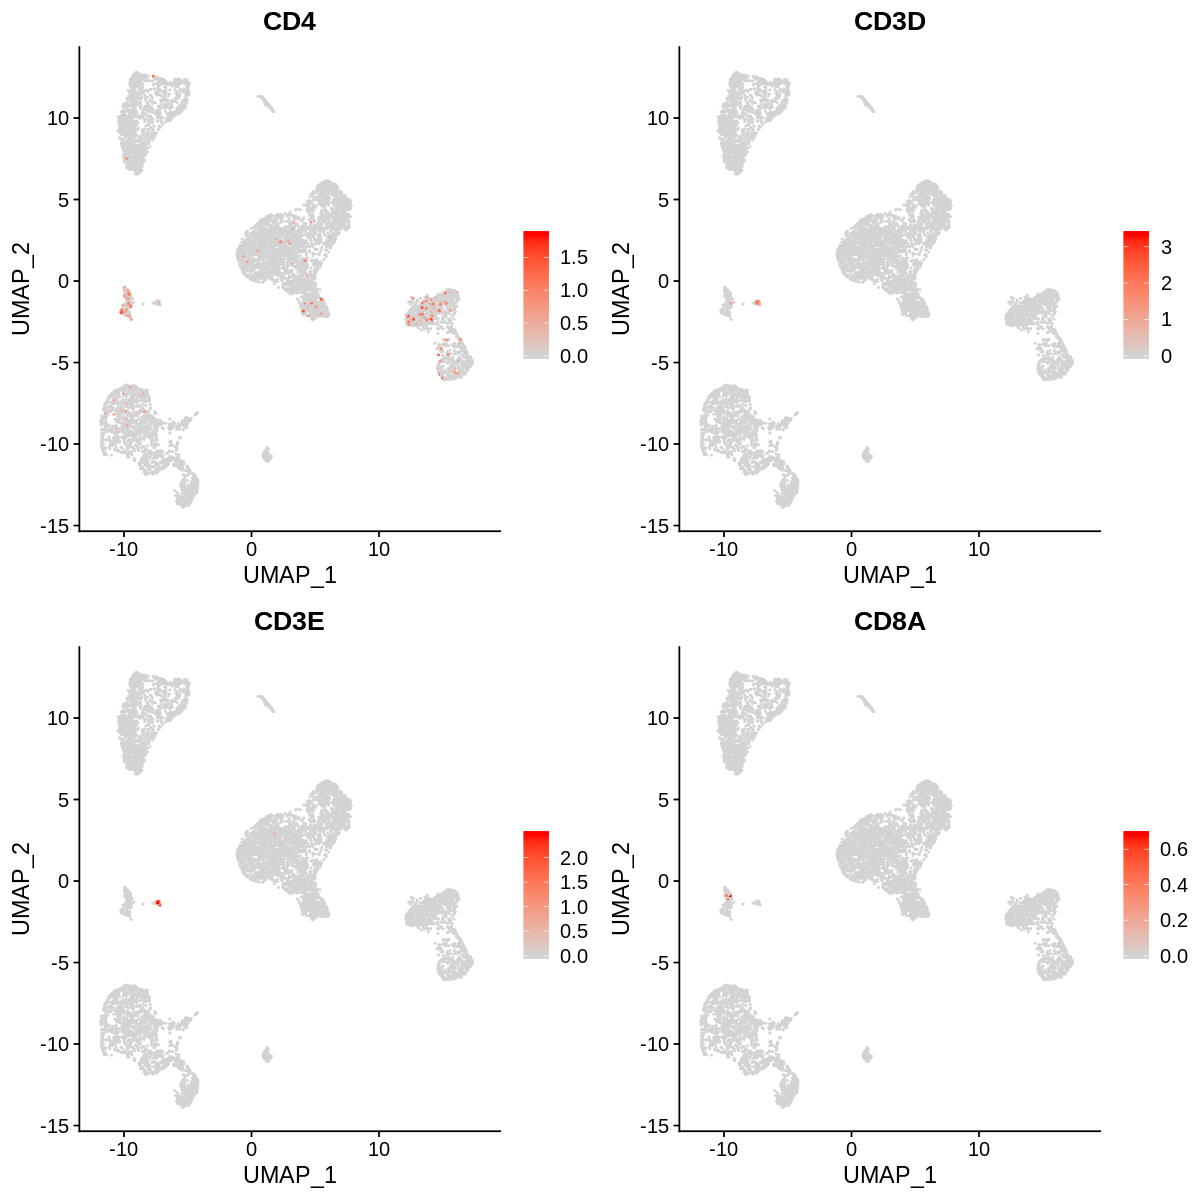

In [20]:
#immune T
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF2, features = c("CD4","CD3D","CD3E","CD8A"),cols=c("lightgrey", "red"))

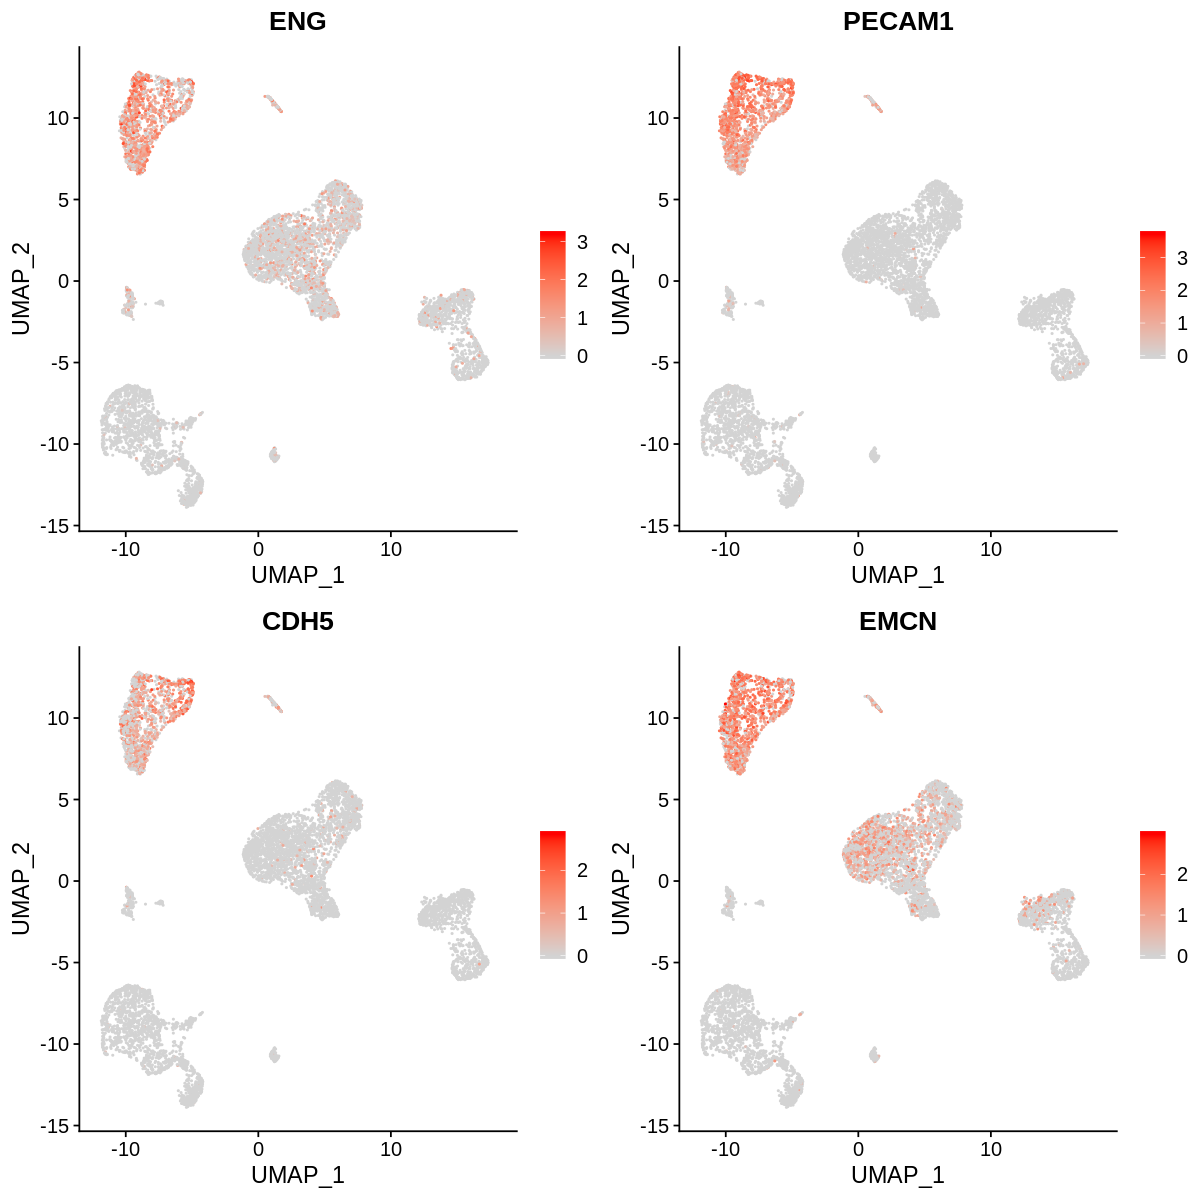

In [21]:
#endothelial cells
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF2, features = c("ENG","PECAM1","CDH5","EMCN"),cols=c("lightgrey", "red"))

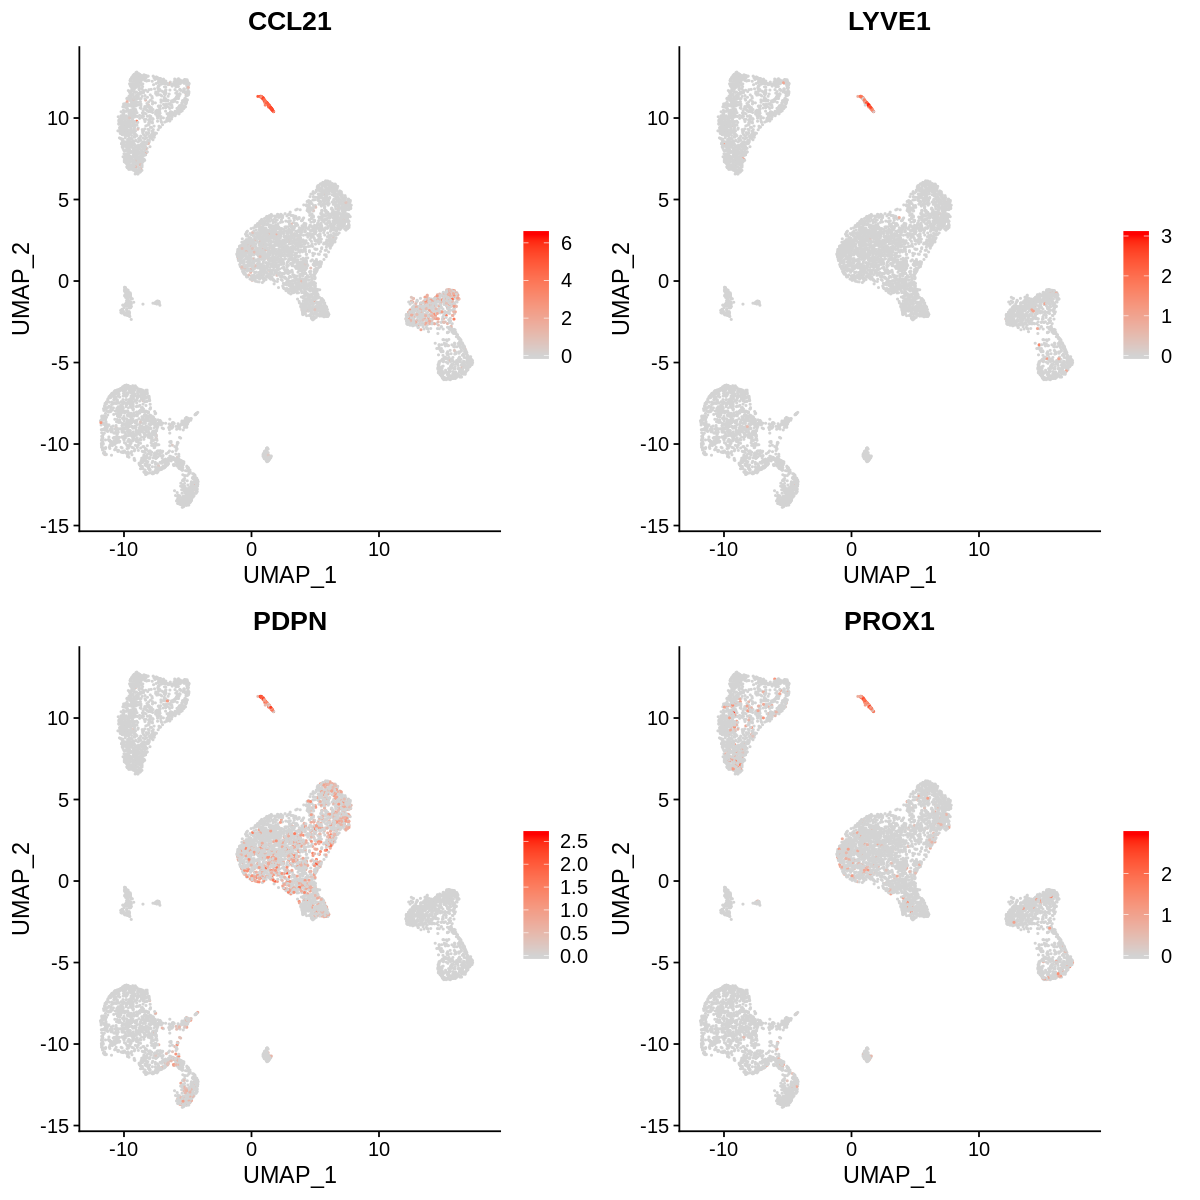

In [22]:
#lymphatic endothelial marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF2, features = c("CCL21","LYVE1","PDPN","PROX1"),cols=c("lightgrey", "red"))

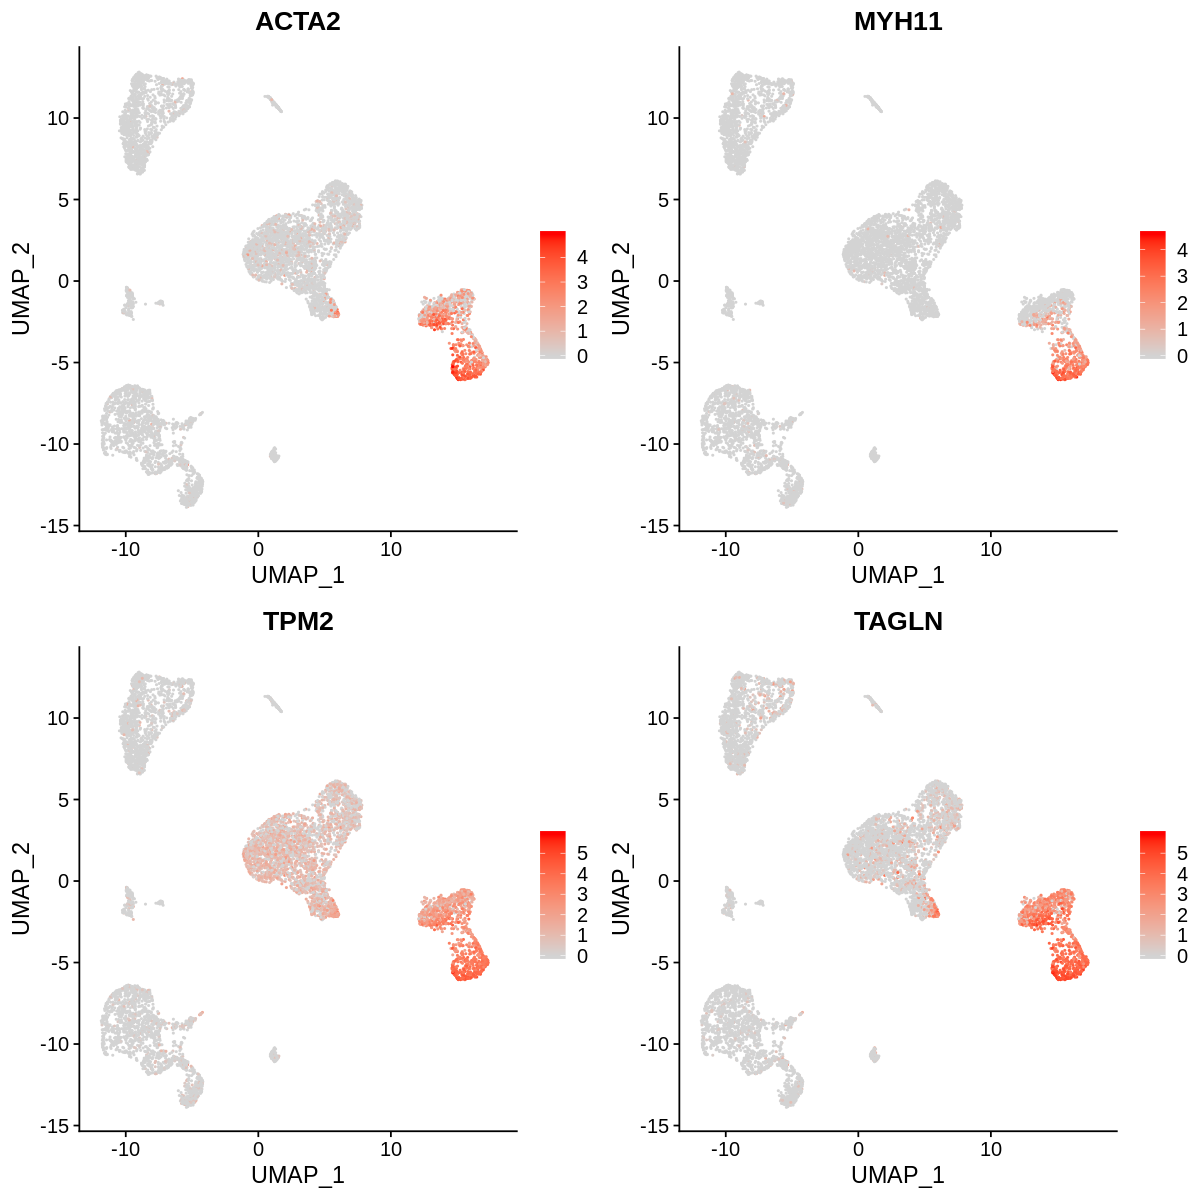

In [23]:
#muscle fiber marker
options(repr.plot.width=10,repr.plot.height=10)
FeaturePlot(NF2, features = c("ACTA2","MYH11","TPM2","TAGLN"),cols=c("lightgrey", "red"))

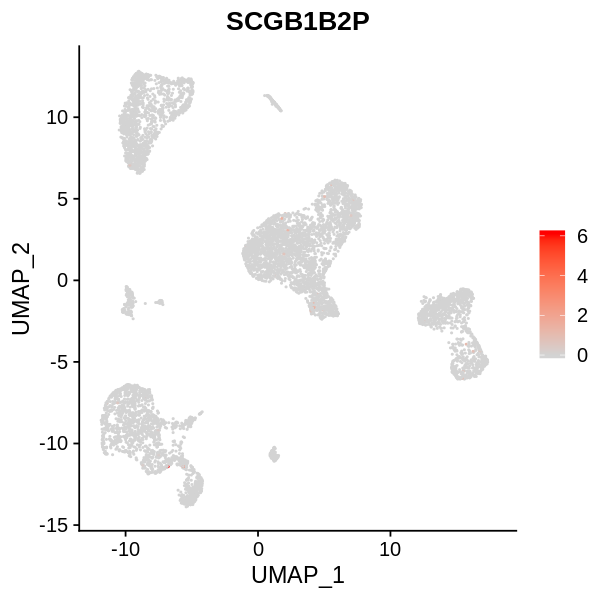

In [24]:
#secretory (glandular) cells
options(repr.plot.width=5,repr.plot.height=5)
FeaturePlot(NF2, features = c("SCGB1B2P"),cols=c("lightgrey", "red"))

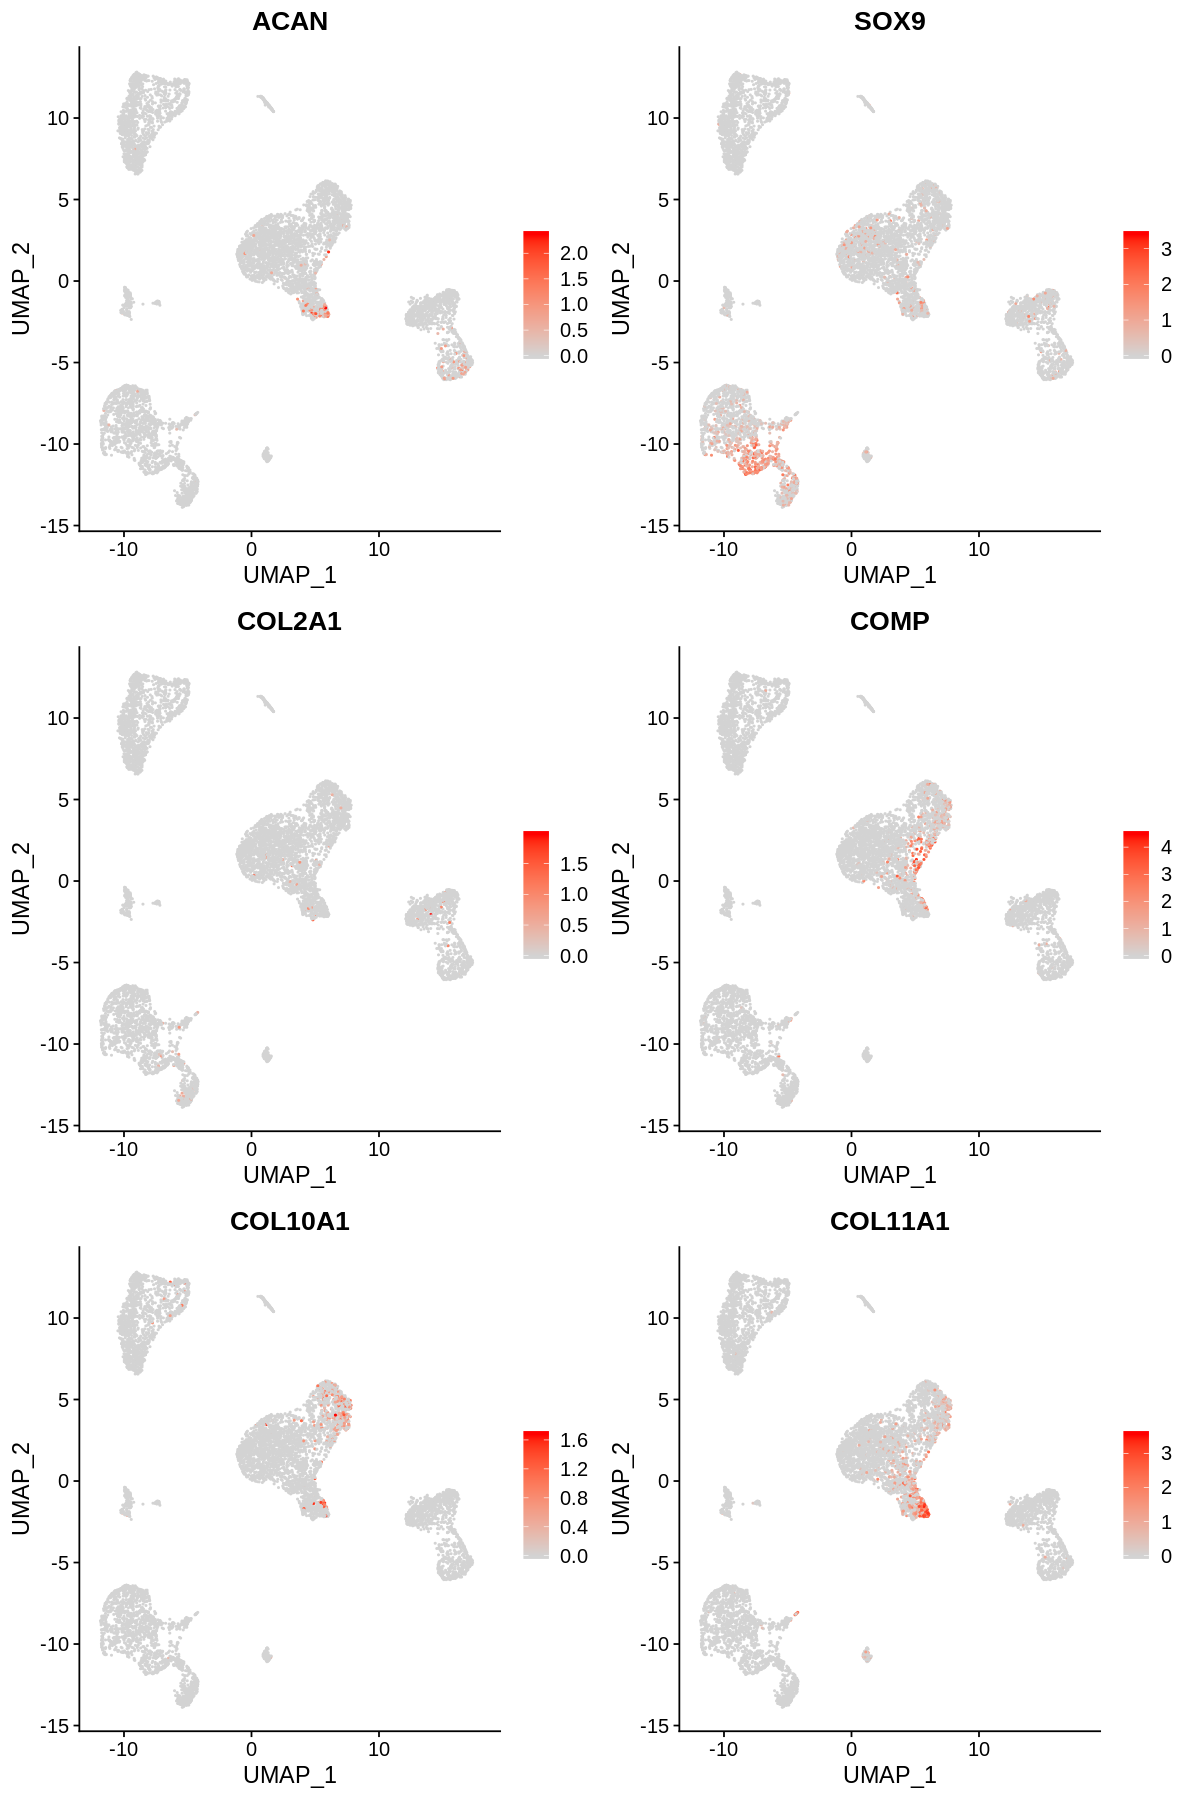

In [25]:
options(repr.plot.width=10,repr.plot.height=15)
FeaturePlot(NF2, features = c("ACAN","SOX9","COL2A1","COMP","COL10A1","COL11A1"),nc=2,cols=c("lightgrey", "red"))

In [26]:
dim(NF2)
NF2$dataset=rep("NF2",ncol(NF2))

[1] 21531  7523

In [27]:
table(Idents(NF2))


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14 
1562 1002  956  778  682  676  399  360  345  271  144  111  102   91   44 

In [28]:
NF2.fib=subset(NF2,idents = c("0","3","4"))

In [29]:
NF2.fib

An object of class Seurat 
21531 features across 3022 samples within 1 assay 
Active assay: RNA (21531 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [30]:
setwd("/mnt/dfc_data1/project/hobart/hospital/scRNAseq_keloid/allSample/NF2")

In [31]:
save(NF2,file="NF2.seurat.object.Rdata")

In [32]:
save(NF2.fib,file="NF2.fib.seurat.object.Rdata")

# #####################################################

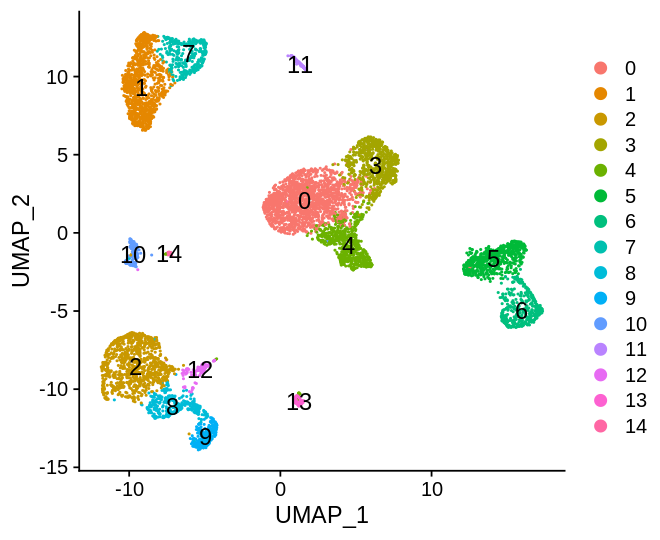

In [33]:
library(cowplot)
options(repr.plot.width=5.5,repr.plot.height=4.5)
DimPlot(NF2, reduction = "umap",label = T,label.size = 5)

In [34]:
new.cluster.id=c("Fibroblast","Endothelial","Keratinocyte","Fibroblast","Fibroblast","muscle_fiber","muscle_fiber","Endothelial","Keratinocyte","Keratinocyte","Immune_cell","Lymphatic_endothelial","Keratinocyte","Melanocytes","Immune_cell")
names(new.cluster.id)=levels(NF2)
NF2=RenameIdents(NF2,new.cluster.id)

In [35]:
table(Idents(NF2))


           Fibroblast           Endothelial          Keratinocyte 
                 3022                  1362                  1674 
         muscle_fiber           Immune_cell Lymphatic_endothelial 
                 1075                   188                   111 
          Melanocytes 
                   91 

In [36]:
write.csv(table(Idents(NF2)),"NF2.cluster_cellType_Statis.csv")

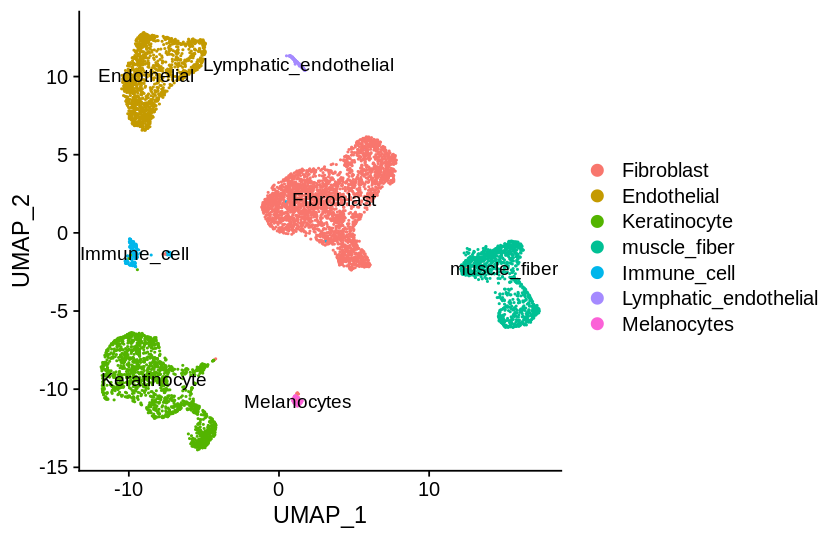

In [40]:
library(cowplot)
options(repr.plot.width=7,repr.plot.height=4.5)
DimPlot(NF2, reduction = "umap",label = T,label.size = 4)